<a href="https://colab.research.google.com/github/J-Salt/IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Table
---

In [ ]:
import pandas as pd


adultTrainingDF  = pd.read_csv("https://raw.githubusercontent.com/J-Salt/IDS/main/HW4/adult_training.csv");

adultTrainingDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


#Creating a Contingency Table
---
This contingency table summarizes the work class and sex of the workers and the sex vs marital status

In [ ]:
crosstab_workclass_sex = pd.crosstab(adultTrainingDF.workclass, adultTrainingDF.sex)

print(crosstab_workclass_sex)

crosstab_sex_marital = pd.crosstab(adultTrainingDF.sex, "adultTrainingDF.marital-status")

print(crosstab_sex_marital)


sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4
col_0   adultTrainingDF.marital-status
sex                                   
Female                            4912
Male                              9885


#Displaying the workers that are over 40
---

In [ ]:
adultOver40 = adultTrainingDF[adultTrainingDF["age"] > 40]
adultOver40

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


#Making a contingency table for workers over 40
---

In [ ]:
crosstab_over40_sex_marital = pd.crosstab(adultOver40.sex, "adultOver40.marital-status")

print(crosstab_over40_sex_marital)

col_0   adultOver40.marital-status
sex                               
Female                        1806
Male                          4338


#Finding outliers and plotting density graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


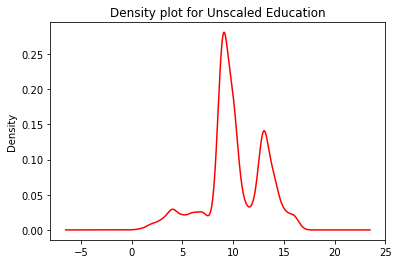

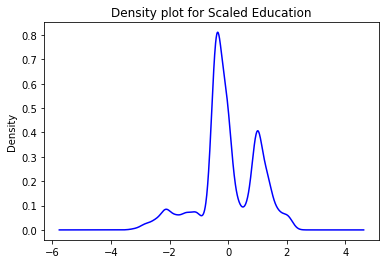

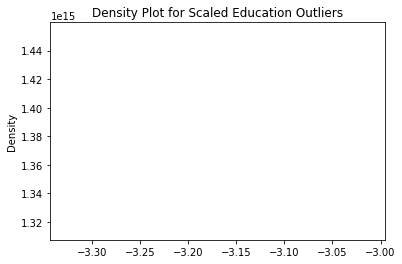

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt


adultOver40['scaled_education'] = stats.zscore(adultOver40.education, nan_policy='omit')
adultOver40.education.plot.density(color="red")
plt.title('Density plot for Unscaled Education')
plt.show()


adultOver40.scaled_education.plot.density(color="blue")
plt.title('Density plot for Scaled Education')
plt.show()

adultOver40_outliers = adultOver40.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']
adultOver40_outliers.plot.density()
plt.title('Density Plot for Scaled Education Outliers')
plt.show()

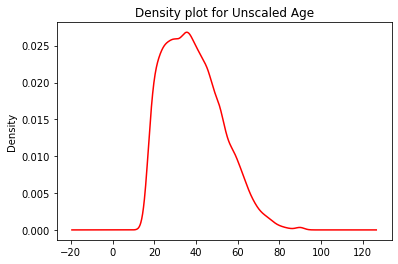

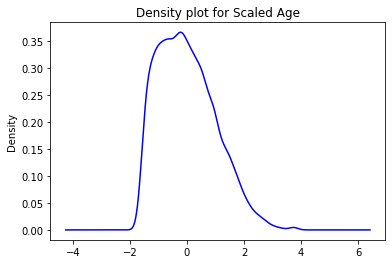

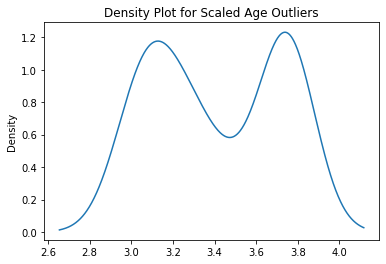

,age,education,capital-gain,capital-loss,scaled_age
count,14797.000000,14797.000000,14797.000000,14797.000000,1.479700e+04
mean,38.687437,10.068798,1066.581604,88.580793,5.678291e-17
std,13.678875,2.598297,7255.455373,406.322208,1.000034e+00
min,17.000000,1.000000,0.000000,0.000000,-1.585523e+00
25%,28.000000,9.000000,0.000000,0.000000,-7.813360e-01
50%,37.000000,10.000000,0.000000,0.000000,-1.233649e-01
75%,48.000000,12.000000,0.000000,0.000000,6.808219e-01
max,90.000000,16.000000,99999.000000,4356.000000,3.751354e+00


In [ ]:
adultTrainingDF['scaled_age'] = stats.zscore(adultTrainingDF.age, nan_policy='omit')
adultTrainingDF.age.plot.density(color="red")
plt.title('Density plot for Unscaled Age')
plt.show()


adultTrainingDF.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled Age')
plt.show()

adultTrainingDF_outliers = adultTrainingDF.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']
adultTrainingDF_outliers.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()

adultTrainingDF.describe()

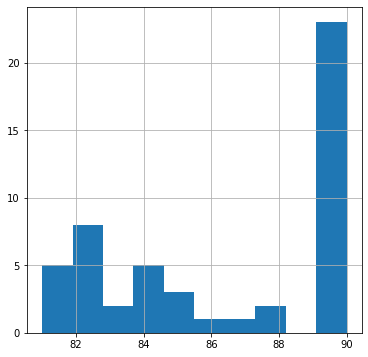

In [ ]:
adultTrainingOver80 = adultTrainingDF[adultTrainingDF["age"] > 80]
adultTrainingOver80['age'].hist(bins=10, figsize=(6,6))
plt.show()
